In [0]:
#################################################################################################################
# Sentiment Analysis - Twitter Feed Democrats and Republicans and objective review of sentiment without bias    # 
# Project Data Analysis Task: Review the Twitter Feed of the President of the United States and the             # 
# the democratic candidate and present the results in a project Report both written and presented                   #
# (Information Visualization)                                                                                   # 
#################################################################################################################

In [0]:
####################################################################################################################
# Project Type: Twitter Data Sentiment Analysis and Tweet Text Tokention, Lemmitization, Stemmimng and NLP         #
# Project Charter: process one collection of Twiiter data and summarize information from a number of fields.       #
# This is similar to the example programs for Twitter hashtags or Facebook counts but must access different and    # 
# more fields than in those examples.                                                                              #
# Project Specified Tasks: process one collection of data and separate it into different categories and give some  # 
# summary statistics on those categories. For example, bin the tweets by day or by hour and report on the number   # 
# of tweets per day or hour. Process two or more collections of data and compare some summary data about the two   #
# collections.                                                                                                     #
# For example, collect Twitter user timelines from different political candidates and compare the number of        #
# retweets of their tweets.                                                                                        # 
# Project Deliverable: Sentiment Analysis of Twitter tweets on The President of the United States (POTUS) and 
# Various opponents such as Nancy Pelosi and Senator Bernie Sanders
#                                                                                        #
# Project Type: Group Project                                                                                      #
# Project Team:                                                                                                    #                                                                                                    #
# Michael Esparza, PMP, PgMP, CPEM                                                                                 #
# Lily Han                                                                                                         #           
# Jo Vivian, PMP                                                                                                       # 
# Data Source is Twitter via Application Programming Interface (API)                                               #
####################################################################################################################

In [0]:
pip install tweepy

In [0]:
pip install joypy

In [0]:
# With the project plan in place and specifed and implied tasks outlined, import the required modules for the analysis.
# tweepy now imports because of pip install
# re module imported for manipulation of regular text expresssions
# nltk module imported for parsing and language operations and manipulation
import tweepy 
from tweepy import Stream
from tweepy import OAuthHandler
from tweepy.streaming import StreamListener
import json
import pandas as pd
import numpy as np
import joypy
import re    
import nltk  
import string
import warnings

In [0]:
# Based on the amount of data to be explored and reviewed, visual presentation will support the analysis
# Import the required models for information visualization and presentation 
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore", category=DeprecationWarning)
from scipy import stats

In [0]:
pip install credentials

In [0]:
# Determine the current working directory and review to ensure that the data environment is set
import os
cwd = os.getcwd()
print(cwd)

/content


In [0]:
# Review all files in the directory to ensure process is on proper path
import os
files = os.listdir()  
files

['.config', 'Export_Tweets.json', 'sample_data']

In [0]:
# Begin extraction of the raw twitter data. Keys will be required and used to access the raw data
# User Keys presented 
CONSUMER_KEY    = 'Z7swXxO5KISDASwxiJmoHXQnX'
CONSUMER_SECRET = 'VDBJKxoY3MCb7s5YbIl5lTk4HSgayQYIbVxRQ81iGtgD6MdyZq'
# Access Keys presented
ACCESS_TOKEN  = '418036639-PTleI12U9lBDsPDCdiJFjSYqhBkyskGjEScalAzA'
ACCESS_SECRET = 'DAkPHeIJbZ2vyNzGxY9JnoVPhcXoOjOw0o0pO7mItM6vP'
from credentials import *

In [0]:
# Define the Application Programming Interace (API) architecture for data analysis
# Execute authentication ping for API connection verification
def twitter_setup():
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)
    api = tweepy.API(auth)
    return api

In [0]:
# Define a data extraction function for twitter
xtr = twitter_setup()

In [0]:
pip install GetOldTweets3

In [0]:
# Get tweets by username and bound dates

import GetOldTweets3 as got

tweetCriteria = got.manager.TweetCriteria().setUsername("RealDonaldTrump")\
                                           .setSince("2020-01-10")\
                                           .setUntil("2020-01-20")\
                                           .setMaxTweets(5000)\
                                           .setEmoji("unicode")
tweets = got.manager.TweetManager.getTweets(tweetCriteria)

print("The Ten Most Recent tweets from Trump Twitter Handle during the impeachment:\n")
for tweet in tweets[:11]:
    print(tweet.text)
    print()


The Ten Most Recent tweets from Trump Twitter Handle during the impeachment:

Now Mini Mike Bloomberg is critical of Jack Wilson, who saved perhaps hundreds of people in a Church because he was carrying a gun, and knew how to use it. Jack quickly killed the shooter, who was beginning a rampage. Mini is against the 2nd A. His ads are Fake, just like him!

I have never seen the Republican Party as Strong and as Unified as it is right now. Thank you!

I will be going to Austin, Texas. Leaving soon. Always like (love!) being in the Lone Star State. Speaking to our great Farmers. They hit “paydirt” with our incredible new Trade Deals: CHINA, JAPAN, MEXICO, CANADA, SOUTH KOREA, and many others!



“Nancy Pelosi said, it’s not a question of proof, it’s a question of allegations! Oh really?” @JudgeJeanine @FoxNews What a disgrace this Impeachment Scam is for our great Country!

If you listened to the flawed advice of @paulkrugman at the @nytimes, a newspaper that was going broke until I came a

In [0]:
# With the tweet list constructed and most recent 10 tweets reviwed, convert the data to a pandas array
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])
data.head(11)

,Tweets
0,"Now Mini Mike Bloomberg is critical of Jack Wilson, who saved perhaps hundreds of people in a Church because he was carrying a gun, and knew how to use it. Jack quickly killed the shooter, who was..."
1,I have never seen the Republican Party as Strong and as Unified as it is right now. Thank you!
2,"I will be going to Austin, Texas. Leaving soon. Always like (love!) being in the Lone Star State. Speaking to our great Farmers. They hit “paydirt” with our incredible new Trade Deals: CHINA, JAPA..."
3,
4,"“Nancy Pelosi said, it’s not a question of proof, it’s a question of allegations! Oh really?” @JudgeJeanine @FoxNews What a disgrace this Impeachment Scam is for our great Country!"
5,"If you listened to the flawed advice of @paulkrugman at the @nytimes, a newspaper that was going broke until I came along, you would have entirely missed the RECORD BREAKING Stock Market (and othe..."
6,....BUT THE BEST IS YET TO COME!
7,"A massive 200 Billion Dollar Sea Wall, built around New York to protect it from rare storms, is a costly, foolish & environmentally unfriendly idea that, when needed, probably won’t work anyway. I..."
8,"Another Fake Book by two third rate Washington Post reporters, has already proven to be inaccurately reported, to their great embarrassment, all for the purpose of demeaning and belittling a Presi..."
9,"They are taking the Democrat Nomination away from Crazy Bernie, just like last time. Some things never change!"


In [0]:
#Export Dataframe to JSON
Export = data.to_json(r'Export_Tweets.json')

In [0]:
from google.colab import files
files.download("Export_Tweets.json")

In [0]:
_json_file = 'Export_Tweets.json'
pd_json = pd.read_json(_json_file, convert_dates=True)
pd_json.head(11)

,Tweets
0,"Now Mini Mike Bloomberg is critical of Jack Wilson, who saved perhaps hundreds of people in a Church because he was carrying a gun, and knew how to use it. Jack quickly killed the shooter, who was..."
1,I have never seen the Republican Party as Strong and as Unified as it is right now. Thank you!
10,"95% Approval Rating in the Republican Party, A Record. Thank You!"
100,Nancy Pelosi will go down as the absolute worst Speaker of the House in U.S. history!
101,New polling shows that the totally partisan Impeachment Hoax is going nowhere. A vast majority want the Do Nothing Democrats to move on to other things now!
102,"Where have the Radical Left, Do Nothing Democrats gone when they have spent the last 3 days defending the life of Qassem Soleimani, one of the worst terrorists in history and the father of the roa..."
103,"“FBI Director apologizes for FISA Errors (of which there were far to many to be a coincidence!).” @FoxNews Chris, what about all of the lives that were ruined because of the so-called “errors?” Ar..."
104,Will be interviewed tonight by Laura @IngrahamAngle at 10pmE on @FoxNews. Enjoy!
105,She will go down as perhaps the least successful Speaker in U.S. History!
106,I love constantly proving them wrong. It’s easy!


In [0]:
# Determine the mean length of the tweets. tweets are limited to a specific character count, and longer tweet contains 
# additional raw data for sentiment analysis than a short tweet
## Stop Length for a tweet is 140 characters
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
##Average Tweet Length
# We extract the mean of lenghts:
data['len']  = np.array([len(tweet.text) for tweet in tweets])
mean = np.mean(data['len'])

print("The length's average in tweets: {}".format(mean))

The length's average in tweets: 166.1949152542373


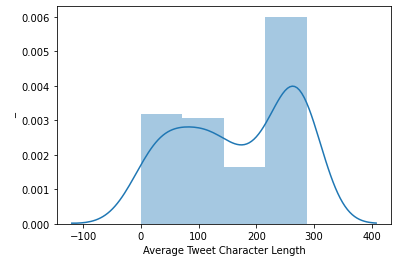

In [0]:
# Visually Represent the mean length of the tweets to the view the statistical spread
sns.distplot(data['len']);
plt.xlabel("Average Tweet Character Length")
plt.ylabel("_")
# Remove the plot text for a clean visual
plt.show()

In [0]:
# After caculating the average length of a tweet, determine the word count
data['word_count'] = data['Tweets'].apply(lambda x: len(str(x).split(" ")))
data[['Tweets','word_count']].head(11)

,Tweets,word_count
0,"Now Mini Mike Bloomberg is critical of Jack Wilson, who saved perhaps hundreds of people in a Church because he was carrying a gun, and knew how to use it. Jack quickly killed the shooter, who was...",53
1,I have never seen the Republican Party as Strong and as Unified as it is right now. Thank you!,19
2,"I will be going to Austin, Texas. Leaving soon. Always like (love!) being in the Lone Star State. Speaking to our great Farmers. They hit “paydirt” with our incredible new Trade Deals: CHINA, JAPA...",41
3,,1
4,"“Nancy Pelosi said, it’s not a question of proof, it’s a question of allegations! Oh really?” @JudgeJeanine @FoxNews What a disgrace this Impeachment Scam is for our great Country!",29
5,"If you listened to the flawed advice of @paulkrugman at the @nytimes, a newspaper that was going broke until I came along, you would have entirely missed the RECORD BREAKING Stock Market (and othe...",45
6,....BUT THE BEST IS YET TO COME!,7
7,"A massive 200 Billion Dollar Sea Wall, built around New York to protect it from rare storms, is a costly, foolish & environmentally unfriendly idea that, when needed, probably won’t work anyway. I...",48
8,"Another Fake Book by two third rate Washington Post reporters, has already proven to be inaccurately reported, to their great embarrassment, all for the purpose of demeaning and belittling a Presi...",46
9,"They are taking the Democrat Nomination away from Crazy Bernie, just like last time. Some things never change!",18


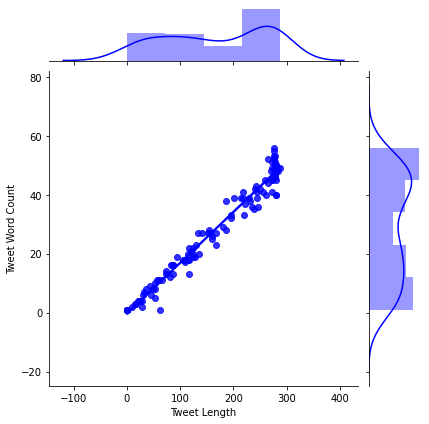

In [0]:
# Visually Represent the word count of the tweets vs the twwet length to the view the statistical relation
sns.jointplot(data = data, x = 'len', y = 'word_count', kind = 'reg', color = 'b')
plt.xlabel("Tweet Length")
plt.ylabel("Tweet Word Count")
# Remove the plot text for a clean visual
plt.show()
# As tweet length increases, so does the word count - word count and tweet length have a positive relation

In [0]:
# Number of Characters - this metric also includes white space
data['char_count'] = data['Tweets'].str.len() 
mean2 = np.mean(data['char_count'])
print("The average character length: {}".format(mean2))

The average character length: 166.1949152542373


In [0]:
def avg_word(sentence):
    words = sentence.split()
    return (sum(len(word) for word in words)/(len(words)))

data['avg_word'] = data['Tweets'].apply(lambda x: avg_word(x))
a = data[['Tweets', 'len', 'char_count','word_count','avg_word']].head(11)
a

,Tweets,len,char_count,word_count,avg_word
0,"Now Mini Mike Bloomberg is critical of Jack Wilson, who saved perhaps hundreds of people in a Church because he was carrying a gun, and knew how to use it. Jack quickly killed the shooter, who was...",277,277,53,4.166667
1,I have never seen the Republican Party as Strong and as Unified as it is right now. Thank you!,94,94,19,3.800000
2,"I will be going to Austin, Texas. Leaving soon. Always like (love!) being in the Lone Star State. Speaking to our great Farmers. They hit “paydirt” with our incredible new Trade Deals: CHINA, JAPA...",244,244,41,4.857143
3,,0,0,1,0.000000
4,"“Nancy Pelosi said, it’s not a question of proof, it’s a question of allegations! Oh really?” @JudgeJeanine @FoxNews What a disgrace this Impeachment Scam is for our great Country!",180,180,29,5.066667
5,"If you listened to the flawed advice of @paulkrugman at the @nytimes, a newspaper that was going broke until I came along, you would have entirely missed the RECORD BREAKING Stock Market (and othe...",273,273,45,4.978261
6,....BUT THE BEST IS YET TO COME!,32,32,7,3.250000
7,"A massive 200 Billion Dollar Sea Wall, built around New York to protect it from rare storms, is a costly, foolish & environmentally unfriendly idea that, when needed, probably won’t work anyway. I...",280,280,48,4.755102
8,"Another Fake Book by two third rate Washington Post reporters, has already proven to be inaccurately reported, to their great embarrassment, all for the purpose of demeaning and belittling a Presi...",279,279,46,4.978723
9,"They are taking the Democrat Nomination away from Crazy Bernie, just like last time. Some things never change!",110,110,18,4.894737


In [0]:
# Identify the quantifiable data attributes to determine sentiment. Structure the required data in the array
# Review the data frame with the added data attributes
data['ID']   = np.array([tweet.id for tweet in tweets])
data['Tweets'] = np.array([tweet.text for tweet in tweets])
display(data.head(11))

,Tweets,len,word_count,char_count,avg_word,ID
0,"Now Mini Mike Bloomberg is critical of Jack Wilson, who saved perhaps hundreds of people in a Church because he was carrying a gun, and knew how to use it. Jack quickly killed the shooter, who was...",277,53,277,4.166667,1219004689716412416
1,I have never seen the Republican Party as Strong and as Unified as it is right now. Thank you!,94,19,94,3.800000,1218962544372670467
2,"I will be going to Austin, Texas. Leaving soon. Always like (love!) being in the Lone Star State. Speaking to our great Farmers. They hit “paydirt” with our incredible new Trade Deals: CHINA, JAPA...",244,41,244,4.857143,1218952496388956162
3,,0,1,0,0.000000,1218752661471793153
4,"“Nancy Pelosi said, it’s not a question of proof, it’s a question of allegations! Oh really?” @JudgeJeanine @FoxNews What a disgrace this Impeachment Scam is for our great Country!",180,29,180,5.066667,1218717833552711680
5,"If you listened to the flawed advice of @paulkrugman at the @nytimes, a newspaper that was going broke until I came along, you would have entirely missed the RECORD BREAKING Stock Market (and othe...",273,45,273,4.978261,1218697758728769536
6,....BUT THE BEST IS YET TO COME!,32,7,32,3.250000,1218697697512820736
7,"A massive 200 Billion Dollar Sea Wall, built around New York to protect it from rare storms, is a costly, foolish & environmentally unfriendly idea that, when needed, probably won’t work anyway. I...",280,48,280,4.755102,1218674016942219265
8,"Another Fake Book by two third rate Washington Post reporters, has already proven to be inaccurately reported, to their great embarrassment, all for the purpose of demeaning and belittling a Presi...",279,46,279,4.978723,1218673508911403008
9,"They are taking the Democrat Nomination away from Crazy Bernie, just like last time. Some things never change!",110,18,110,4.894737,1218668999086694400


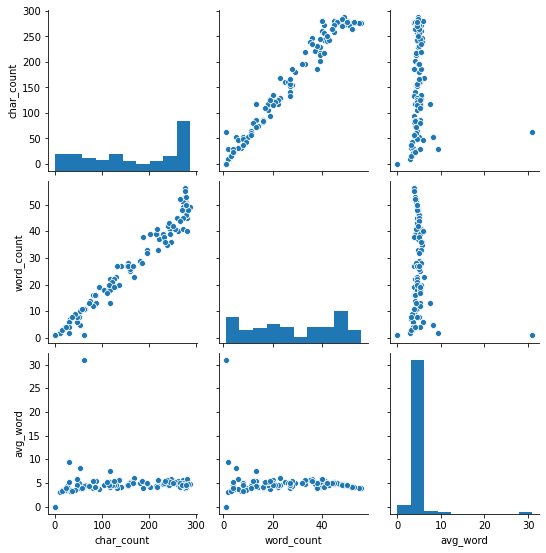

In [0]:
x = sns.pairplot(data[['char_count','word_count','avg_word']], diag_kind="hist")
 
for ax in x.axes.flat: 
    plt.setp(ax.get_xticklabels(), rotation=0)

In [0]:
# With the initial stage of the data task complete (data collection and cleaning), the data analysis task proceeds
# to sentiment analysis
# The NLTK module is imported to support the sentiment analysis, identifying the stopwords
# stopwords will complicate the sentiment analysis
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
# From NLTK, import english stopwords and identify them and fit to the data
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['stopwords'] = data['Tweets'].apply(lambda x: len([x for x in x.split() if x in stop]))
data[['Tweets','char_count','word_count','avg_word','stopwords']].head(11)

,Tweets,char_count,word_count,avg_word,stopwords
0,"Pete Buttigieg is OUT. All of his SuperTuesday votes will go to Sleepy Joe Biden. Great timing. This is the REAL beginning of the Dems taking Bernie out of play - NO NOMINATION, AGAIN!",184,34,4.439871,11
1,"People are disgusted and embarrassed by the Fake News Media, as headed by the @nytimes, @washingtonpost, @comcast &amp; MSDNC, @ABC, @CBSNews and more. They no longer believe what they see and rea...",266,45,4.932237,14
2,"“Who better than @RepRatcliffe, who got to the bottom of the FISAGATE &amp; RUSSIAGATE HOAX. It makes a lot of sense to put John Ratcliffe in there (DNI).The Senate should quickly approve him. @De...",270,45,5.021106,17
3,"A Poll in today’s New York Post says that 77% of “U.S. adults have confidence in their government’s ability to handle the Coronavirus (Number One), compared to other health threats.” 64% for Zika,...",277,48,4.790669,17
4,"The food is GREAT at Sammy’s Mexican Grill in Phoenix, Arizona. Congratulations to Betty & Jorge Rivas on doing such a wonderful job. I will try hard to stop by the next time I am in Phoenix. Supp...",223,40,4.598850,14
5,"Coronavirus: In addition to screening travelers “prior to boarding” from certain designated high risk countries, or areas within those countries, they will also be screened when they arrive in Ame...",246,36,5.859483,11
6,.....a very dark and lonely path! Your reputation will never be the same!,73,13,4.688701,5
7,"Mini Mike Bloomberg’s consultants and so-called “advisors”(how did that advice work out? Don’t ask!), are on the “gravy train” and all making a fortune for themselves pushing Mini hard, when they ...",279,47,4.956392,20
8,"I would find it hard to believe that failed presidential candidates Tom Steyer, or Mini Mike Bloombeg, would contribute to the Democrat Party, even against me, after the way they have been treated...",271,48,4.665695,17
9,"Tom Steyer who, other than Mini Mike Bloomberg, spent more dollars for NOTHING than any candidate in history, quit the race today proclaiming how thrilled he was to be a part of the the Democrat C...",264,48,4.519892,20


In [0]:
# With the inital EDA complete, convert the tweet text to lower case for context frre grammar (CFG) sentiment analysis task
data['Tweets'] = data['Tweets'].apply(lambda x: " ".join(x.lower() for x in x.split()))
data['Tweets'].head(11)

0                    pete buttigieg is out. all of his supertuesday votes will go to sleepy joe biden. great timing. this is the real beginning of the dems taking bernie out of play - no nomination, again!
1     people are disgusted and embarrassed by the fake news media, as headed by the @nytimes, @washingtonpost, @comcast &amp; msdnc, @abc, @cbsnews and more. they no longer believe what they see and rea...
2     “who better than @repratcliffe, who got to the bottom of the fisagate &amp; russiagate hoax. it makes a lot of sense to put john ratcliffe in there (dni).the senate should quickly approve him. @de...
3     a poll in today’s new york post says that 77% of “u.s. adults have confidence in their government’s ability to handle the coronavirus (number one), compared to other health threats.” 64% for zika,...
4     the food is great at sammy’s mexican grill in phoenix, arizona. congratulations to betty & jorge rivas on doing such a wonderful job. i will try hard to stop by the next 

In [0]:
# Strip the text of punctuation in order to have clean text data for the analysis
data['Tweets'] = data['Tweets'].str.replace('[^\w\s]','')
data['Tweets'].head(11)

0                          pete buttigieg is out all of his supertuesday votes will go to sleepy joe biden great timing this is the real beginning of the dems taking bernie out of play  no nomination again
1     people are disgusted and embarrassed by the fake news media as headed by the nytimes washingtonpost comcast amp msdnc abc cbsnews and more they no longer believe what they see and read and for goo...
2     who better than repratcliffe who got to the bottom of the fisagate amp russiagate hoax it makes a lot of sense to put john ratcliffe in there dnithe senate should quickly approve him devinnunes ma...
3     a poll in todays new york post says that 77 of us adults have confidence in their governments ability to handle the coronavirus number one compared to other health threats 64 for zika 58 for ebola...
4     the food is great at sammys mexican grill in phoenix arizona congratulations to betty  jorge rivas on doing such a wonderful job i will try hard to stop by the next time 

In [0]:
# Remove the english commonly used stopword for a clear grammar
from nltk.corpus import stopwords
stop = stopwords.words('english')
data['Tweets']= data['Tweets'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
data['Tweets'].head(11)

0                                                                          pete buttigieg supertuesday votes go sleepy joe biden great timing real beginning dems taking bernie play nomination
1                    people disgusted embarrassed fake news media headed nytimes washingtonpost comcast amp msdnc abc cbsnews longer believe see read good reason fake news indeed enemy people
2         better repratcliffe got bottom fisagate amp russiagate hoax makes lot sense put john ratcliffe dnithe senate quickly approve devinnunes mariabartiromo john great job american people
3     poll todays new york post says 77 us adults confidence governments ability handle coronavirus number one compared health threats 64 zika 58 ebola others way list professionals great job
4                                  food great sammys mexican grill phoenix arizona congratulations betty jorge rivas wonderful job try hard stop next time phoenix support sammys foxandfriends
5        coronavirus addition screening 

In [0]:
#Remove common words and review the resulting grammar
freq = pd.Series(' '.join(data['Tweets']).split()).value_counts()[:30]
freq

great           14
mini            10
mike            10
south            9
carolina         9
trump            8
thank            7
coronavirus      7
amp              6
us               5
bernie           5
john             5
people           5
news             5
hard             5
see              5
job              5
presidential     4
fake             4
doesnt           4
democrat         4
debates          4
tom              4
way              4
foxnews          4
cnn              4
away             4
countries        4
total            4
nomination       4
dtype: int64

In [0]:
# Remove the short words and review the results
data['Tweets'] = data['Tweets'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
data.head(11)

,Tweets,len,word_count,char_count,avg_word,ID,stopwords
0,pete buttigieg supertuesday votes sleepy biden great timing real beginning dems taking bernie play nomination,184,34,184,4.439871,1234263037110083587,11
1,people disgusted embarrassed fake news media headed nytimes washingtonpost comcast msdnc cbsnews longer believe read good reason fake news indeed enemy people,266,45,266,4.932237,1234225268207898627,14
2,better repratcliffe bottom fisagate russiagate hoax makes sense john ratcliffe dnithe senate quickly approve devinnunes mariabartiromo john great american people,270,45,270,5.021106,1234222094210211846,17
3,poll todays york post says adults confidence governments ability handle coronavirus number compared health threats zika ebola others list professionals great,277,48,277,4.790669,1234211248373403648,17
4,food great sammys mexican grill phoenix arizona congratulations betty jorge rivas wonderful hard stop next time phoenix support sammys foxandfriends,223,40,223,4.598850,1234134094797295617,14
5,coronavirus addition screening travelers prior boarding certain designated high risk countries areas within countries also screened arrive america thank secazar cdcgov cdcdirector,246,36,246,5.859483,1234109126864707585,11
6,dark lonely path reputation never,73,13,73,4.688701,1234107028295077888,5
7,mini mike bloombergs consultants socalled advisorshow advice work dont gravy train making fortune pushing mini hard knew never takes dont anymore mike,279,47,279,4.956392,1234107011614285824,20
8,would find hard believe failed presidential candidates steyer mini mike bloombeg would contribute democrat party even treated laughed mocked real politicians spit,271,48,271,4.665695,1233990259802767360,17
9,steyer mini mike bloomberg spent dollars nothing candidate history quit race today proclaiming thrilled part democrat clown show away save whatever little money left,264,48,264,4.519892,1233987865350148097,20


In [0]:
# With short words removed, conduct another run to remove common words and shorten the grammar to be subjected to analysis
freq = pd.Series(' '.join(data['Tweets']).split()).value_counts()[:30]
freq

great              14
mike               10
mini               10
carolina            9
south               9
trump               8
coronavirus         7
thank               7
news                5
john                5
hard                5
bernie              5
people              5
presidential        4
debates             4
away                4
fake                4
total               4
nomination          4
countries           4
democrat            4
doesnt              4
foxnews             4
working             3
nothing             3
congratulations     3
dems                3
worst               3
president           3
good                3
dtype: int64

In [0]:
# Upon review of the resulting grammar after the processing, spelling normalization is required
# Correct the spelling of the grammar by importing textblob module

In [0]:
pip install textblob

In [0]:
#After the pip install, import the required module for the data analysis task
from textblob import TextBlob
data['Tweets'][:11].apply(lambda x: str(TextBlob(x).correct()))

0                                                                          peter buttigieg supertuesday votes sleepy widen great timing real beginning gems taking berne play nomination
1                             people disgusted embarrassed face news media headed times washingtonpost coast msdnc cbsnews longer believe read good reason face news indeed enemy people
2                       better repratcliffe bottom fisagate russiagate hoax makes sense john ratcliffe unite senate quickly approve devinnunes mariabartiromo john great american people
3                            poll today york post says adults confidence governments ability handle coronavirus number compared health threats like ebook others list professional great
4                                       food great says mexican drill phoenix arizona congratulations petty forge rival wonderful hard stop next time phoenix support says foxandfriends
5     coronavirus addition screening travelers prior boarding certain desig

In [0]:
# With the cleaned grammar lexicon, begin text mining for data sentiment
data.head(11)

,Tweets,len,word_count,char_count,avg_word,ID,stopwords
0,pete buttigieg supertuesday votes sleepy biden great timing real beginning dems taking bernie play nomination,184,34,184,4.439871,1234263037110083587,11
1,people disgusted embarrassed fake news media headed nytimes washingtonpost comcast msdnc cbsnews longer believe read good reason fake news indeed enemy people,266,45,266,4.932237,1234225268207898627,14
2,better repratcliffe bottom fisagate russiagate hoax makes sense john ratcliffe dnithe senate quickly approve devinnunes mariabartiromo john great american people,270,45,270,5.021106,1234222094210211846,17
3,poll todays york post says adults confidence governments ability handle coronavirus number compared health threats zika ebola others list professionals great,277,48,277,4.790669,1234211248373403648,17
4,food great sammys mexican grill phoenix arizona congratulations betty jorge rivas wonderful hard stop next time phoenix support sammys foxandfriends,223,40,223,4.598850,1234134094797295617,14
5,coronavirus addition screening travelers prior boarding certain designated high risk countries areas within countries also screened arrive america thank secazar cdcgov cdcdirector,246,36,246,5.859483,1234109126864707585,11
6,dark lonely path reputation never,73,13,73,4.688701,1234107028295077888,5
7,mini mike bloombergs consultants socalled advisorshow advice work dont gravy train making fortune pushing mini hard knew never takes dont anymore mike,279,47,279,4.956392,1234107011614285824,20
8,would find hard believe failed presidential candidates steyer mini mike bloombeg would contribute democrat party even treated laughed mocked real politicians spit,271,48,271,4.665695,1233990259802767360,17
9,steyer mini mike bloomberg spent dollars nothing candidate history quit race today proclaiming thrilled part democrat clown show away save whatever little money left,264,48,264,4.519892,1233987865350148097,20


In [0]:
# Review the tweet text data to start to identify patterns and general sentiment
text = data['Tweets']
text.head(11)

0                                                                           pete buttigieg supertuesday votes sleepy biden great timing real beginning dems taking bernie play nomination
1                          people disgusted embarrassed fake news media headed nytimes washingtonpost comcast msdnc cbsnews longer believe read good reason fake news indeed enemy people
2                       better repratcliffe bottom fisagate russiagate hoax makes sense john ratcliffe dnithe senate quickly approve devinnunes mariabartiromo john great american people
3                           poll todays york post says adults confidence governments ability handle coronavirus number compared health threats zika ebola others list professionals great
4                                    food great sammys mexican grill phoenix arizona congratulations betty jorge rivas wonderful hard stop next time phoenix support sammys foxandfriends
5     coronavirus addition screening travelers prior boarding certain 

In [0]:
# Clean the tweet text, and remove unrequired white spaces
# Import the required module 
def tweet_cleaner_(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    try:
        bom_removed = souped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        bom_removed = souped
    stripped = re.sub(combined_pat, '', bom_removed)
    stripped = re.sub(www_pat, '', stripped)
    lower_case = stripped.lower()
    neg_handled = neg_pattern.sub(lambda x: negations_dic[x.group()], lower_case)
    letters_only = re.sub("[^a-zA-Z]", " ", neg_handled)
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = [x for x  in tok.tokenize(letters_only) if len(x) > 1]
    return (" ".join(words)).strip()

In [0]:
pip install twython

  Created wheel for twython: filename=twython-3.7.0-cp36-none-any.whl size=31996 sha256=dd66ea7f52fbe334aa20bc93fd50ec958200afcd734e08e4f024d9282b050f46
  Stored in directory: /root/.cache/pip/wheels/c2/b0/a3/5c4b4b87b8c9e4d99f1494a0b471f0134a74e5fb33d426d009
Successfully built twython


In [0]:
pip install wordcloud

In [0]:
# Import the required modules to conduct the sentiment analysis. In order to present the sentiment information visually
# employ word clouds and charts to present and visualize the sentiment
import numpy as np
import matplotlib.pyplot as plt
import re
from twython import Twython
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
from IPython.display import Image as im

In [0]:
# With the cleaned grammar, create a string of words from the text list to mine
raw_string = ''.join(text)
no_links = re.sub(r'http\S+', '', raw_string)
no_unicode = re.sub(r"\\[a-z][a-z]?[0-9]+", '', no_links)
no_special_characters = re.sub('[^A-Za-z ]+', '', no_unicode)

In [0]:
# Continue to refine the data task and grammar by removing stop words, short connectors and indefinte articles
words = no_special_characters.split(" ")
words = [w for w in words if len(w) > 2]  # ignore a, an, be, ...
words = [w.lower() for w in words]
words = [w for w in words if w not in STOPWORDS]

In [0]:
# Create a grammar word cloud based on the mined text for and inital review of the tweets sentiment. maximize the word count
# at 3000
wc = WordCloud(background_color="gray", max_words=3000)
clean_string = ','.join(words)
wc.generate(clean_string)

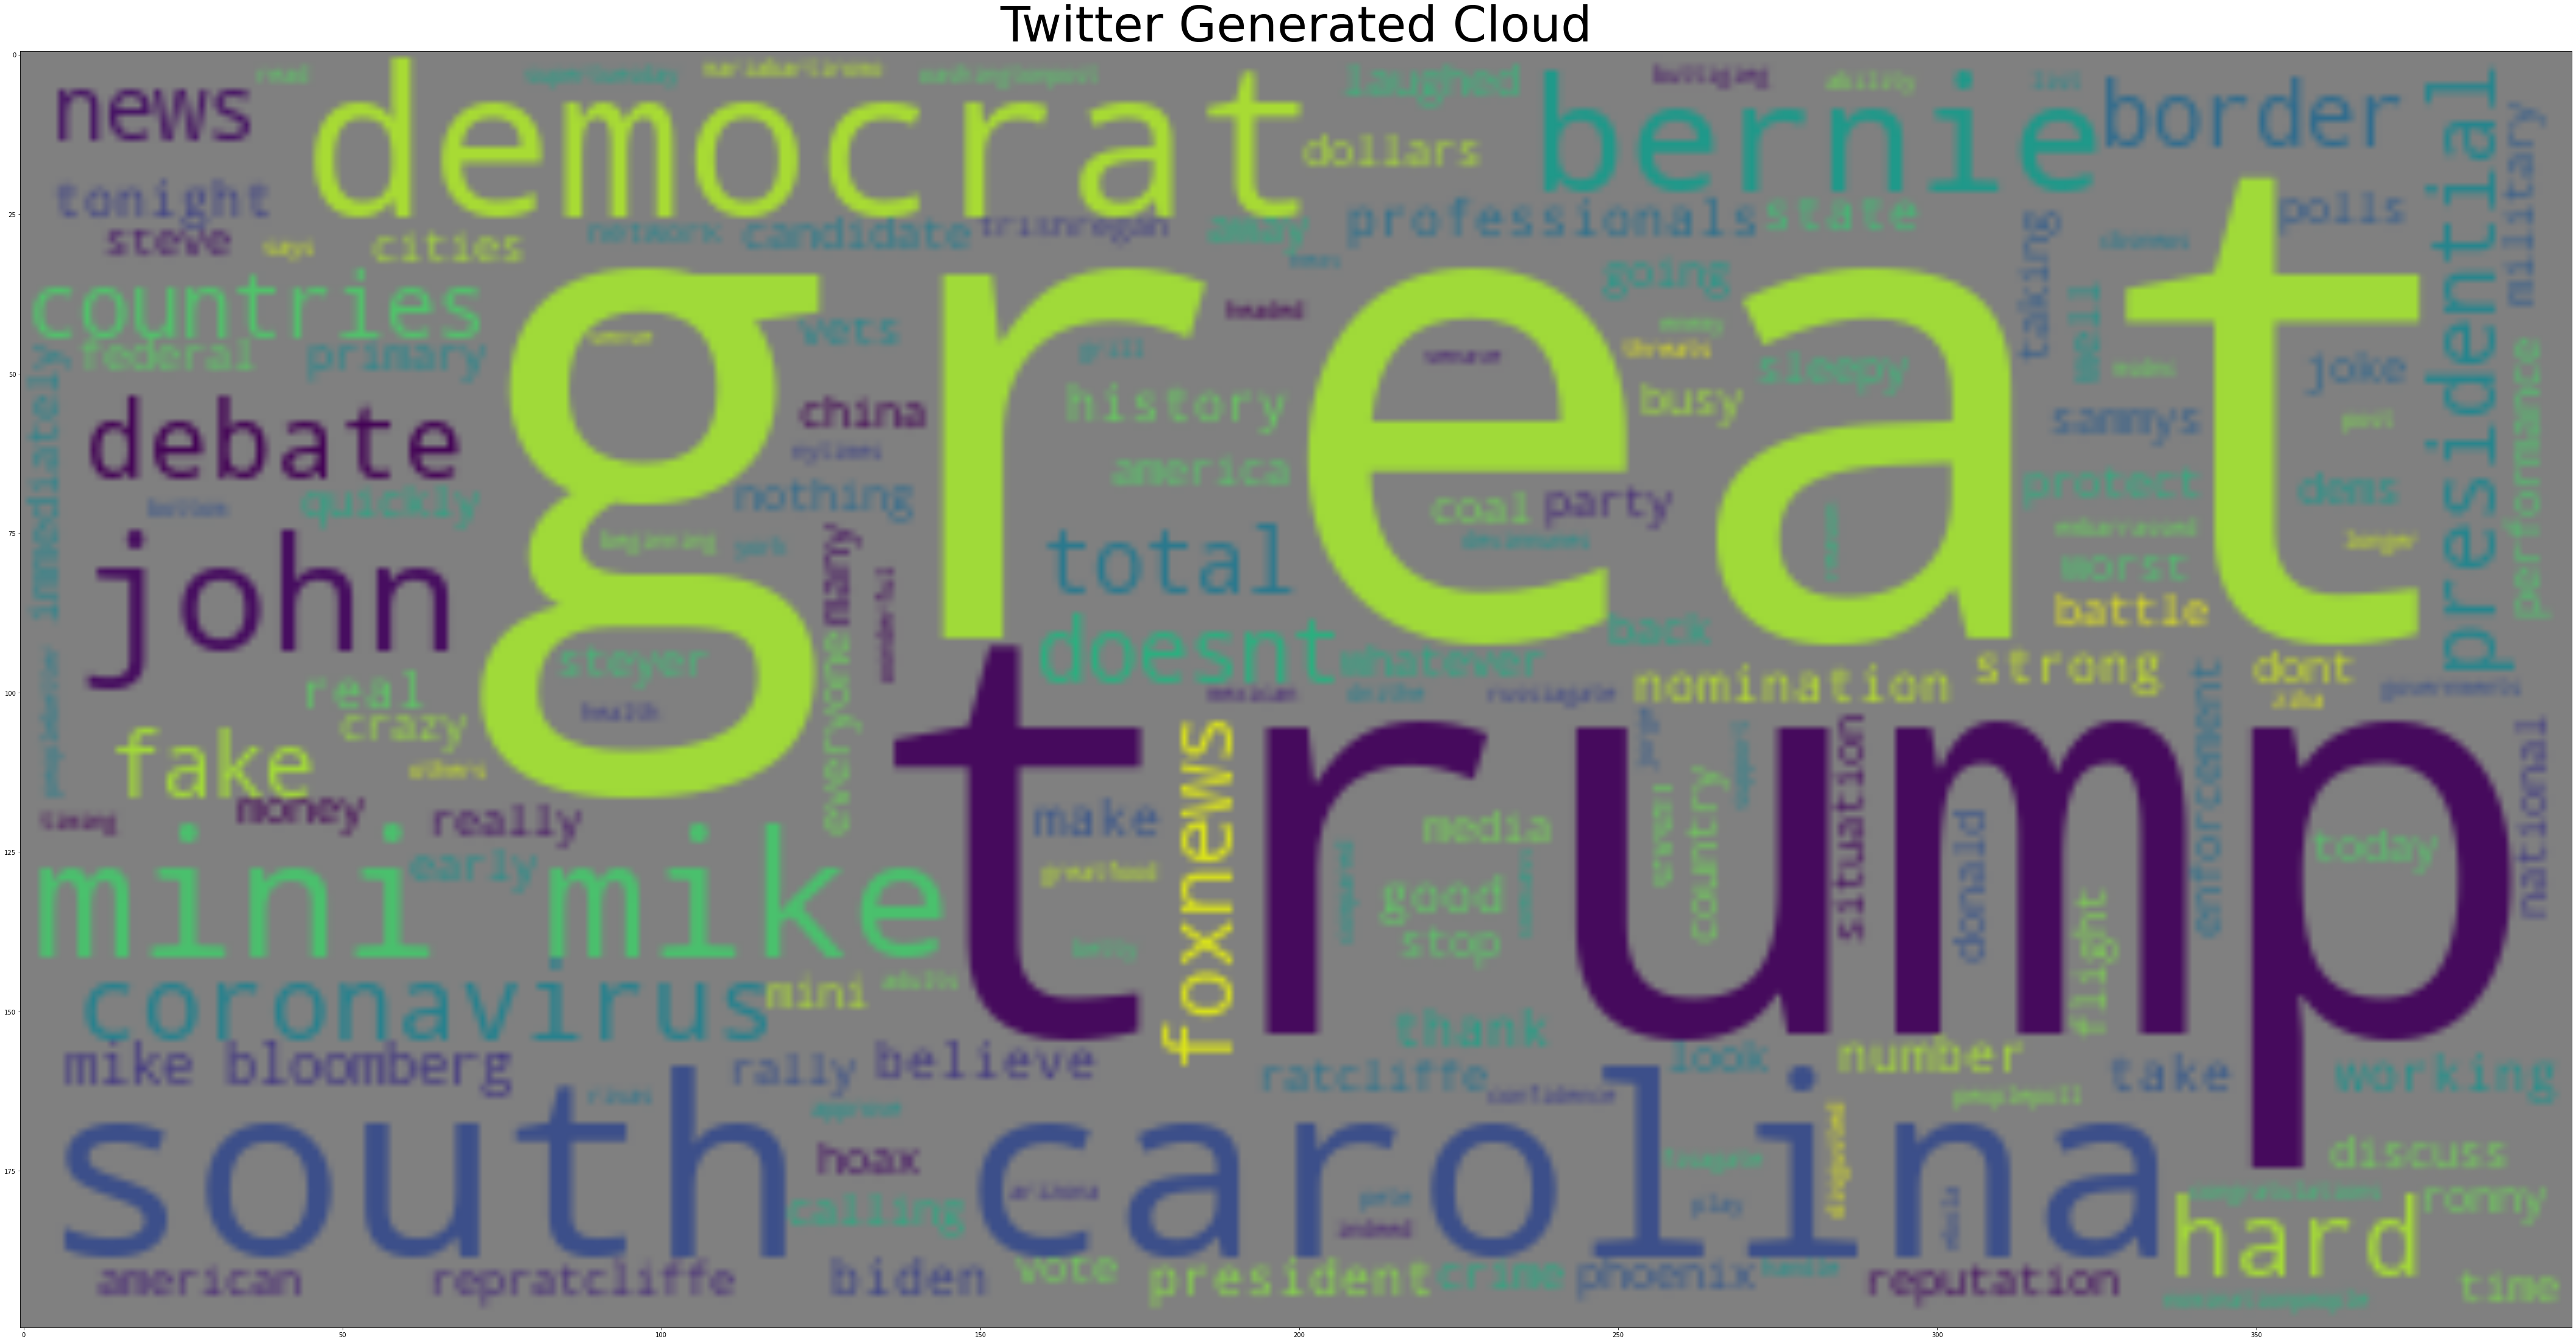

In [0]:
# Generate the Word Cloud Plot and compare against the initial text mine processes
w = plt.figure(figsize=(75,75))
plt.title('Original Stencil', size=50)
plt.imshow(wc, interpolation='bilinear')
plt.title('Twitter Generated Cloud', size=80)
plt.show()

In [0]:
# With the viusal from the Word Cloud, proceed with a quantitative sentiment analysis. 
# Initial review indicates a negative sentiment, although "great" and "president" almost have the same weight in the 
# Word Cloud
# Remove the links and special characters in the mined text
from textblob import TextBlob
import re

def clean_tweet(tweet):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [0]:
# Display the results of the sub-program
data['SA'] = np.array([ analize_sentiment(tweet) for tweet in data['Tweets'] ])
display(data.head(11))

,Tweets,len,word_count,char_count,avg_word,ID,stopwords,SA
0,american people agree senate needs witnesses documents president trump blocked house like every impeachment trial like trial question whether senators listen realtime,245,39,245,5.307692,1219004520803508224,16,0
1,week marked important chapter congress constitution america whole moments stood defendourdemocracy,160,25,160,5.440000,1218724132130578434,13,1
2,house representatives filed brief impeachment trial president donald trump nobody defendourdemocracy httpsintelligencehousegovnewsdocumentsingleaspxdocumentid913,223,25,223,7.960000,1218702672477544448,11,0
3,president impeached nothing either leader mcconnell change realtime,111,19,111,4.894737,1218635582135554049,10,0
4,house could ignore presidents abuses power neither senate realtime,101,17,101,5.000000,1218579290775805952,7,0
5,house done constitutional duty senate done finally take action bills sent forthepeople lower drug costs bipartisan background checks raise wage,238,40,238,4.975000,1218547269085036544,17,1
6,wonderful hear alyssa nakken become first woman coach herstory proud sfgiants cant wait future holds,168,31,168,4.451613,1218249274489819138,14,1
7,read full statement,28,5,28,4.800000,1217911230532411392,2,1
8,today senate passed usmca transformed democrats leadership grim reaper leader mcconnell must allow votes housepassed bills raise minimum wage lower prescription drug prices forthepeople,242,36,242,5.750000,1217883177034735616,12,-1
9,tune impeachment managers cross capitol exhibition housepassed articles impeachment,122,19,122,5.473684,1217855031795486720,9,0


In [0]:
# Using a Postive, Neutral and Negative binning process
# Create the requisite lists based in their weights and sentiment
pos_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] < 0]

In [0]:
# Calculate the percentage of each classification
print('Percentage of positive tweets: {}%'.format(len(pos_tweets)*100/len(data['Tweets'])))
print('Percentage of neutral tweets: {}%'.format(len(neu_tweets)*100/len(data['Tweets'])))
print('Percentage of negative tweets: {}%'.format(len(neg_tweets)*100/len(data['Tweets'])))

Percentage of positive tweets: 40.74074074074074%
Percentage of neutral tweets: 46.2962962962963%
Percentage of negative tweets: 12.962962962962964%


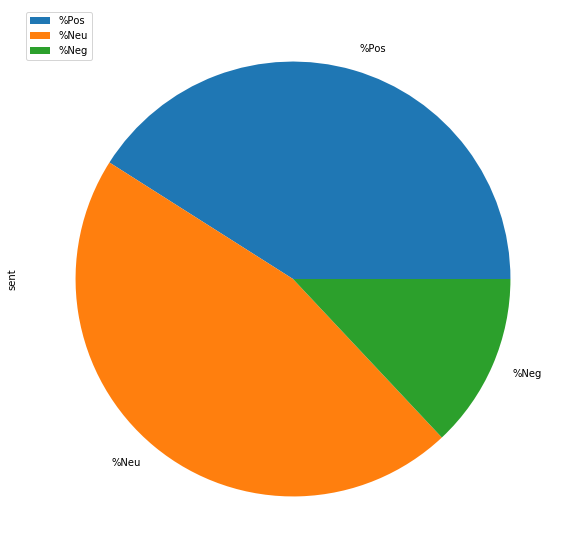

In [0]:
# Plot the percentages of the analysis in a pie chart, round up per standard statistical convention
df = pd.DataFrame({'sent': [41,46, 13]},index=['%Pos', '%Neu', '%Neg'])
plot = df.plot.pie(y='sent', figsize=(10, 10))

In [0]:
#Tokenization
import nltk
nltk.download('punkt')
TextBlob(data['Tweets'][50]).words

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


WordList(['president', 'impeached', 'amount', 'gamesmanship', 'leader', 'mcconnell', 'erase', 'fact', 'defendourdemocracy', 'thisweekabc'])

In [0]:
# Stemming of -ing, 's and -ly
from nltk.stem import PorterStemmer
st = PorterStemmer()
data['Tweets'][:11].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0                                      american peopl agre senat need wit document presid trump block hous like everi impeach trial like trial question whether senat listen realtim
1                                                                                          week mark import chapter congress constitut america whole moment stood defendourdemocraci
2                                    hous repres file brief impeach trial presid donald trump nobodi defendourdemocraci httpsintelligencehousegovnewsdocumentsingleaspxdocumentid913
3                                                                                                                           presid impeach noth either leader mcconnel chang realtim
4                                                                                                                           hous could ignor presid abus power neither senat realtim
5                                                  hous done constitut duti senat done final ta

In [0]:
# Convert Words to the root word
import nltk
nltk.download('wordnet')
from textblob import Word
data['Tweets'] = data['Tweets'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
data['Tweets'].head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0    american people agree senate need witness document president trump blocked house like every impeachment trial like trial question whether senator listen realtime
1                                                                    week marked important chapter congress constitution america whole moment stood defendourdemocracy
2     house representative filed brief impeachment trial president donald trump nobody defendourdemocracy httpsintelligencehousegovnewsdocumentsingleaspxdocumentid913
3                                                                                                  president impeached nothing either leader mcconnell change realtime
4                                                                                                     house could ignore president abuse power neither senate realtime
Name: Tweets, dtype: object

In [0]:
# N-Grams - Combo of bigrams N=2 and N=3
# Determine which words occur in combination for further analysis
TextBlob(data['Tweets'][0]).ngrams(2)

[WordList(['american', 'people']),
 WordList(['people', 'agree']),
 WordList(['agree', 'senate']),
 WordList(['senate', 'need']),
 WordList(['need', 'witness']),
 WordList(['witness', 'document']),
 WordList(['document', 'president']),
 WordList(['president', 'trump']),
 WordList(['trump', 'blocked']),
 WordList(['blocked', 'house']),
 WordList(['house', 'like']),
 WordList(['like', 'every']),
 WordList(['every', 'impeachment']),
 WordList(['impeachment', 'trial']),
 WordList(['trial', 'like']),
 WordList(['like', 'trial']),
 WordList(['trial', 'question']),
 WordList(['question', 'whether']),
 WordList(['whether', 'senator']),
 WordList(['senator', 'listen']),
 WordList(['listen', 'realtime'])]

In [0]:
TextBlob(data['Tweets'][0]).ngrams(3)

[WordList(['american', 'people', 'agree']),
 WordList(['people', 'agree', 'senate']),
 WordList(['agree', 'senate', 'need']),
 WordList(['senate', 'need', 'witness']),
 WordList(['need', 'witness', 'document']),
 WordList(['witness', 'document', 'president']),
 WordList(['document', 'president', 'trump']),
 WordList(['president', 'trump', 'blocked']),
 WordList(['trump', 'blocked', 'house']),
 WordList(['blocked', 'house', 'like']),
 WordList(['house', 'like', 'every']),
 WordList(['like', 'every', 'impeachment']),
 WordList(['every', 'impeachment', 'trial']),
 WordList(['impeachment', 'trial', 'like']),
 WordList(['trial', 'like', 'trial']),
 WordList(['like', 'trial', 'question']),
 WordList(['trial', 'question', 'whether']),
 WordList(['question', 'whether', 'senator']),
 WordList(['whether', 'senator', 'listen']),
 WordList(['senator', 'listen', 'realtime'])]

In [0]:
# Review the raw text and array 
a.head(11)

,Tweets,len,char_count,word_count,avg_word
0,"The American people agree: the Senate needs to see the witnesses and documents that President Trump blocked in the House. Just like every other impeachment trial, just like any trial. The question...",245,245,39,5.307692
1,"This week marked an important chapter for the U.S. Congress, our Constitution, and America as a whole. Here are some moments that stood out. #DefendOurDemocracy",160,160,25,5.440000
2,The House of Representatives has filed its brief in the impeachment trial of President Donald J. Trump. Nobody is the above the law. #DefendOurDemocracy https://intelligence.house.gov/news/documen...,223,223,25,7.960000
3,The President has been impeached – and nothing either he or Leader McConnell can do will change that. #RealTime,111,111,19,4.894737
4,The House could not ignore the President’s abuses of power – and neither should the Senate. #RealTime,101,101,17,5.000000
5,"The House has done its Constitutional duty. When the Senate is done with theirs, they should finally take action on the bills we have sent them #ForThePeople: Lower Drug Costs Now Act Bipartisan B...",238,238,40,4.975000
6,"Wonderful to hear that Alyssa Nakken has become the first woman coach in MLB herstory! Proud of both her and our @SFGiants, and can’t wait to see what the future holds.",168,168,31,4.451613
7,Read my full statement here:,28,28,5,4.800000
8,"Today, the Senate passed a #USMCA that has been transformed by Democrats’ leadership. Now, “Grim Reaper” Leader McConnell must allow votes on House-passed bills to raise the minimum wage, lower pr...",242,242,36,5.750000
9,Tune in as the Impeachment Managers cross the U.S. Capitol for the exhibition of the House-passed articles of impeachment.,122,122,19,5.473684


In [0]:
import string 
from nltk.corpus import stopwords 
stopwords = stopwords.words("english")

def _clean(txt):
    txt = txt.lower()
    txt = "".join(x for x in txt if x not in string.punctuation)
    words = txt.split()
    words = [w for w in words if w not in stopwords]
    txt = " ".join(words)
    return txt

a["cleaned"] = a['Tweets'].apply(lambda x : _clean(x))

a[["Tweets", "cleaned"]]

,Tweets,cleaned
0,"The American people agree: the Senate needs to see the witnesses and documents that President Trump blocked in the House. Just like every other impeachment trial, just like any trial. The question...",american people agree senate needs see witnesses documents president trump blocked house like every impeachment trial like trial question whether senators listen realtime
1,"This week marked an important chapter for the U.S. Congress, our Constitution, and America as a whole. Here are some moments that stood out. #DefendOurDemocracy",week marked important chapter us congress constitution america whole moments stood defendourdemocracy
2,The House of Representatives has filed its brief in the impeachment trial of President Donald J. Trump. Nobody is the above the law. #DefendOurDemocracy https://intelligence.house.gov/news/documen...,house representatives filed brief impeachment trial president donald j trump nobody law defendourdemocracy httpsintelligencehousegovnewsdocumentsingleaspxdocumentid913
3,The President has been impeached – and nothing either he or Leader McConnell can do will change that. #RealTime,president impeached – nothing either leader mcconnell change realtime
4,The House could not ignore the President’s abuses of power – and neither should the Senate. #RealTime,house could ignore president’s abuses power – neither senate realtime
5,"The House has done its Constitutional duty. When the Senate is done with theirs, they should finally take action on the bills we have sent them #ForThePeople: Lower Drug Costs Now Act Bipartisan B...",house done constitutional duty senate done finally take action bills sent forthepeople lower drug costs act bipartisan background checks act raise wage act
6,"Wonderful to hear that Alyssa Nakken has become the first woman coach in MLB herstory! Proud of both her and our @SFGiants, and can’t wait to see what the future holds.",wonderful hear alyssa nakken become first woman coach mlb herstory proud sfgiants can’t wait see future holds
7,Read my full statement here:,read full statement
8,"Today, the Senate passed a #USMCA that has been transformed by Democrats’ leadership. Now, “Grim Reaper” Leader McConnell must allow votes on House-passed bills to raise the minimum wage, lower pr...",today senate passed usmca transformed democrats’ leadership “grim reaper” leader mcconnell must allow votes housepassed bills raise minimum wage lower prescription drug prices forthepeople
9,Tune in as the Impeachment Managers cross the U.S. Capitol for the exhibition of the House-passed articles of impeachment.,tune impeachment managers cross us capitol exhibition housepassed articles impeachment


In [0]:
# Identify key Words of the Data Task 
from collections import Counter
complete_text = " ".join(data["Tweets"])
clean_text = _clean(complete_text)
Counter(clean_text.split()).most_common(10)

[('president', 24),
 ('defendourdemocracy', 24),
 ('impeachment', 20),
 ('senate', 18),
 ('house', 15),
 ('trump', 13),
 ('trial', 12),
 ('american', 10),
 ('manager', 10),
 ('committee', 9)]

In [0]:
# Identify the Top 10 Uniform Resource Locators (URL) for further investigation 
htags = [w for w in complete_text.split() if w.startswith("http")]
htags = [w for w in htags if "demon" not in w.lower()]
Counter(htags).most_common(10)

[('httpswwwfacebookcomnancypelosi', 3),
 ('httpsintelligencehousegovnewsdocumentsingleaspxdocumentid913', 1),
 ('httpswwwgaogovassets710703909pdf', 1),
 ('httpswwwspeakergovnewsroom11420', 1)]

In [0]:
# Identify the major themes in the grammar and as a result of text mining 
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np 

def create_theme_models(clean_text):
    cvectorizer = CountVectorizer(min_df=4, max_features=3000)
    cvz = cvectorizer.fit_transform(text)

    lda_model = LatentDirichletAllocation(n_components=10, learning_method='online', max_iter=20, random_state=42)
    X_topics = lda_model.fit_transform(cvz)

    theme_word = lda_model.components_ 
    vocab = cvectorizer.get_feature_names()
    return theme_word, vocab 

n_top_words = 10
theme_word, vocab = create_theme_models(a["cleaned"].values)
for i, theme_dist in enumerate(theme_word):
    theme_words = np.array(vocab)[np.argsort(theme_dist)][:-(n_top_words+1):-1]
    print ("Theme " + str(i+1) + ": " + " | ".join(theme_words) + "\n")

Theme 1: impeachment | trump | president | defendourdemocracy | house | senate | trial | manager | article | tune

Theme 2: american | must | trump | capitol | every | tune | defendourdemocracy | manager | document | people

Theme 3: american | every | president | people | action | manager | trump | must | document | former

Theme 4: trump | impeachment | manager | president | house | defendourdemocracy | trial | senate | must | article

Theme 5: president | senate | trump | witness | trial | defendourdemocracy | document | mcconnell | impeached | must

Theme 6: mcconnell | today | leader | people | must | senate | tune | member | committee | judiciary

Theme 7: defendourdemocracy | manager | trial | impeachment | president | today | constitution | house | senate | former

Theme 8: article | impeachment | capitol | tune | document | manager | people | committee | former | witness

Theme 9: committee | member | judiciary | defendourdemocracy | house | former | impeachment | constitution

In [0]:
#Old Tweets Code